<a href="https://colab.research.google.com/github/n70l/T5_pROJECT/blob/main/Exercise_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/T5/Week7_Introduction to Natural Language Processing/1- Introduction to Natural Language Processing/LAB/Datasets'

Mounted at /content/drive
/content/drive/MyDrive/T5/Week7_Introduction to Natural Language Processing/1- Introduction to Natural Language Processing/LAB/Datasets


In [ ]:
df = pd.read_csv("final_dialect_dataset.csv", encoding='utf8', engine='python')

In [ ]:
df.head()

,id,dialect,tweet
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [ ]:
df.sample(5)

,id,dialect,tweet
231376,1097895789693726848,DZ,@samykhalildz @_ReadytoChange نعم لا للعهدة ال...
166874,1045238833183371264,JO,@hamuda87 والناس زي اللي بغابة
334463,1120293978413383552,KW,@Bin_Salleh ربي يردك سالم غانم
237874,1186721420711211008,DZ,@ie00ie لي يزعفني 😤😤😤 مانحب حتى واحد يزعفني ول...
115125,1116294918107009024,PL,لولا الطب.كان ما لقتوشن ناس تسبوا عليهم و تحكو...


In [ ]:
df.tail()

,id,dialect,tweet
458287,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
458288,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي
458289,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...
458290,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋
458291,1022409931029458944,BH,@jolnar121 السحله ضيفي ي بتطلع لك سحليه😅😅


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458292 entries, 0 to 458291
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458292 non-null  object
 1   dialect  458197 non-null  object
 2   tweet    458197 non-null  object
dtypes: object(3)
memory usage: 10.5+ MB


In [ ]:
df.describe()

,id,dialect,tweet
count,458292,458197,458197
unique,458287,18,458197
top,#عوض_العلياني,EG,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
freq,3,57636,1


In [ ]:
df['dialect'].unique()

array(['IQ', 'LY', 'QA', 'PL', None, 'SY', 'TN', 'JO', 'MA', 'SA', 'YE',
       'DZ', 'EG', 'LB', 'KW', 'OM', 'SD', 'AE', 'BH'], dtype=object)

In [ ]:
df.drop(columns=['id'], inplace=True)

Text(0.5, 1.0, 'Number of tweets per dialect')

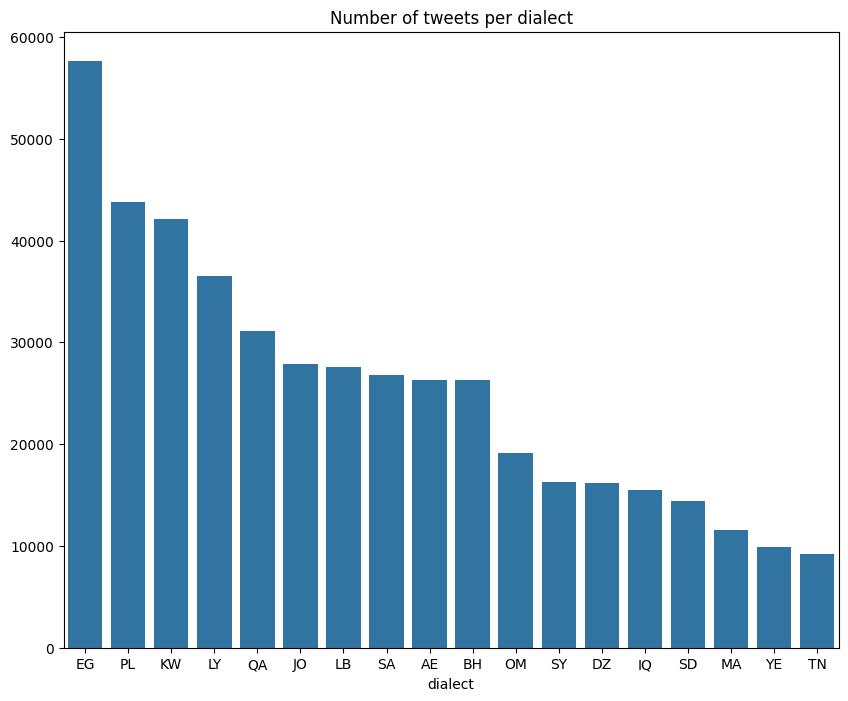

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(x = df['dialect'].value_counts().index, y =df['dialect'].value_counts().values)
plt.xlabel('dialect')

plt.title('Number of tweets per dialect')

In [ ]:
from sklearn.model_selection import train_test_split
train_val, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.2, random_state=42)

In [ ]:
train

,dialect,tweet
240841,DZ,@mlissabylka نونا علابالها ماحلباتكش غير انت م...
377253,OM,يا....حبك بقلبي ترى ماله عدد\nواسمك يالغاليه ...
393397,SD,@DaliaMohmed18 @ameenmohamed @JasminAdil_8 كله...
214742,SA,@L9arami على اساس انت وناديك مبيض وجه الوطن\nم...
375731,OM,@itsAlrayan حبيبتي انتِ ما تقصري، مالي نفس أكل...
...,...,...
242851,DZ,راح زد رصيدك 7 بس مستحيل انسى اجمل واروع صداقه...
248683,EG,مائة عام من التحفيل ع الزمالك ولسة الناس مزهقتش .
264806,EG,@MohamedGlobeOn تعبير صادق مش محتاج تفسير ...ي...
93554,PL,عندي الف اشي اعملو \nو مش جاي عبالي اترك الجوا...


###Using Regex to clean the tweets

In [ ]:
import re

emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U0001F700-\U0001F77F"  # alchemical symbols
    u"\U00002702-\U000027B0"  # miscellaneous symbols
    u"\U000024C2-\U0001F251"  # enclosed characters
    u"\U0001F926-\U0001F937"  # additional symbols
    u"\U00010000-\U0010ffff"  # supplemental symbols
    u"\u2640-\u2642"          # gender symbols
    u"\u2600-\u26FF"          # miscellaneous symbols
    u"\u2700-\u27BF"          # dingbats
    u"\u23CF"                 # eject symbol
    u"\u23E9"                 # fast-forward symbol
    u"\u231A"                 # watch symbol
    u"\uFE0F"                 # variation selector
    u"\u2069"                 # superscript
    u"\u2066"                 # invisible separator
    u"\u200B"                 # zero-width space
    "]+", re.UNICODE)

def regex_manipulation(tweet):
    if isinstance(tweet, str):  # Check if the input is a string
        tweet = re.sub(r"@\S+", "", tweet)  # Remove @ and username
        tweet = re.sub(r"(?:http:\/\/|https?:\/\/)\S+", "", tweet)  # Remove http/https Links
        tweet = re.sub(r"[0-9]+", "", tweet)  # Delete numbers
        tweet = re.sub(r"&amp;|&quot;|&gt;", "", tweet)  # Delete HTML components
        tweet = re.sub(r'\s*[A-Za-z]+\b', "", tweet)  # Delete English words
        tweet = emoji_pattern.sub("", tweet)  # Remove Emojis
        tweet = re.sub(r"[#,\/]", "", tweet)  # Remove #, /, and ,
        return tweet
    else:
        return tweet  # Return the input unchanged if it's not a string


# Test the function
output = regex_manipulation('@itsAlrayan حبيبي انت ما00fikkfkl/a# تقصر، مالي نفس أكل')
print(output)
train['tweet'] = train['tweet'].apply(regex_manipulation)
train['tweet']

 حبيبي انت ما تقصر، مالي نفس أكل


,tweet
240841,نونا علابالها ماحلباتكش غير انت ماعلابالكش
377253,يا....حبك بقلبي ترى ماله عدد\nواسمك يالغاليه ...
393397,كلهم بلعبوا بينا وبقينا ما عارفين نعمل شنو ...
214742,على اساس انت وناديك مبيض وجه الوطن\nمرخ عصاقي...
375731,حبيبتي انتِ ما تقصري، مالي نفس أكل عشان كذا م...
...,...
242851,راح زد رصيدك بس مستحيل انسى اجمل واروع صداقه ...
248683,مائة عام من التحفيل ع الزمالك ولسة الناس مزهقتش .
264806,تعبير صادق مش محتاج تفسير ...يالها من امومه ل...
93554,عندي الف اشي اعملو \nو مش جاي عبالي اترك الجوا...


###Removing Arabic and English punctuations

In [ ]:
import string

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation

def remove_punctuation(tweet):
    if isinstance(tweet, str):  # Check if the input is a string
        punctuations = arabic_punctuations + english_punctuations
        translator = str.maketrans('', '', punctuations)
        return tweet.translate(translator)
    else:
        return tweet  # Return the input unchanged if it's not a string

# Example usage:
train['tweet'] = train['tweet'].apply(remove_punctuation)
train['tweet']

,tweet
240841,نونا علابالها ماحلباتكش غير انت ماعلابالكش
377253,ياحبك بقلبي ترى ماله عدد\nواسمك يالغاليه به ا...
393397,كلهم بلعبوا بينا وبقينا ما عارفين نعمل شنو ...
214742,على اساس انت وناديك مبيض وجه الوطن\nمرخ عصاقي...
375731,حبيبتي انتِ ما تقصري مالي نفس أكل عشان كذا مت...
...,...
242851,راح زد رصيدك بس مستحيل انسى اجمل واروع صداقه ...
248683,مائة عام من التحفيل ع الزمالك ولسة الناس مزهقتش
264806,تعبير صادق مش محتاج تفسير يالها من امومه لا ت...
93554,عندي الف اشي اعملو \nو مش جاي عبالي اترك الجوا...


###Unifying Arabic letters
To further streamline the dataset, Arabic letters that can appear in various formats (like أ, ؤ, گ) were standardized using regex, ensuring a uniform representation.

In [ ]:
import re

noise = re.compile(""" ّ| َ| ً| ُ| ٌ| ِ| ٍ| ْ|ـ """, re.VERBOSE)

def unify_letters(tweet):
    if isinstance(tweet, str):
      tweet = re.sub("[إأآا]", "ا", tweet)
      tweet = re.sub("ى", "ي", tweet)
      tweet = re.sub("ؤ", "و", tweet)
      tweet = re.sub("ئ", "ي", tweet)
      tweet = re.sub("ة", "ه", tweet)
      tweet = re.sub("گ", "ك", tweet)

      tweet = re.sub(noise, '', tweet)
      return tweet
    else:
      return tweet

train['tweet'] = train['tweet'].apply(unify_letters)
train['tweet']

,tweet
240841,نونا علابالها ماحلباتكش غير انت ماعلابالكش
377253,ياحبك بقلبي تري ماله عدد\nواسمك يالغاليه به ا...
393397,كلهم بلعبوا بينا وبقينا ما عارفين نعمل شنو ...
214742,علي اساس انت وناديك مبيض وجه الوطن\nمرخ عصاقي...
375731,حبيبتي انت ما تقصري مالي نفس اكل عشان كذا متع...
...,...
242851,راح زد رصيدك بس مستحيل انسي اجمل واروع صداقه ...
248683,مايه عام من التحفيل ع الزمالك ولسه الناس مزهقتش
264806,تعبير صادق مش محتاج تفسير يالها من امومه لا ت...
93554,عندي الف اشي اعملو \nو مش جاي عبالي اترك الجوا...


####Removing stop words and extra spaces
Some stop words like ‘إن’, and ‘أن’ do not influence dialect identification, while others like ‘دونك’ (frequently used in Morocco and Algeria) do play a significant role. This guided the selective removal of stop words, retaining those that aid in dialect distinction.

In [ ]:
import nltk
from nltk.corpus import stopwords

# Ensure the stopwords corpus is downloaded
nltk.download('stopwords')

# Load the Arabic stopwords
stop_words = set(stopwords.words('arabic'))

# Remove stopwords from the 'tweet' column
def remove_stop_words_spaces(df, column_name):
    train[column_name] = train[column_name].apply(
        lambda x: ' '.join([word for word in str(x).split() if word not in stop_words])
    )
remove_stop_words_spaces(train, 'tweet')
train['tweet']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tweet
240841,نونا علابالها ماحلباتكش انت ماعلابالكش
377253,ياحبك بقلبي تري ماله عدد واسمك يالغاليه القمه ...
393397,كلهم بلعبوا بينا وبقينا عارفين نعمل شنو الله غ...
214742,علي اساس انت وناديك مبيض وجه الوطن مرخ عصاقيلك...
375731,حبيبتي انت تقصري مالي اكل عشان متعاجزه اسوي سحور
...,...
242851,زد رصيدك مستحيل انسي اجمل واروع صداقه الغوازي ...
248683,مايه عام التحفيل الزمالك ولسه الناس مزهقتش
264806,تعبير صادق مش محتاج تفسير يالها امومه تفرق مين...
93554,عندي الف اشي اعملو مش جاي عبالي اترك الجوال اي...


###Most frequent words in some dialects

In [ ]:
def Pre_Process(tweets):
    clean_tweets_tokenized = []
    clean_tweets_untokenized = []

    for tweet in tweets:
        tweet= regex_manipulation(tweet)
        tweet= remove_punctuation(tweet)
        tweet = unify_letters(tweet)
        # Remove the following line:
        #tweet_tokized ,tweet_untokized = df['tweet'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
        # And add these two lines instead:
        tweet_tokized = ' '.join([word for word in str(tweet).split() if word not in stop_words])
        tweet_untokized = tweet_tokized # Or any other logic to generate untokenized version

        clean_tweets_tokenized.append(tweet_tokized)
        clean_tweets_untokenized.append(tweet_untokized)
    return clean_tweets_tokenized,clean_tweets_untokenized

In [ ]:
clean_df = df.copy()
clean_df['clean_tweet_tokenized'], clean_df['clean_tweet_untokenized']= Pre_Process(df['tweet'])

####Most frequent words in some dialects

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def top_n_word(dialect, n):
    # Extract tokens for the given dialect
    words = [word for tokens in clean_df[clean_df['dialect'] == dialect]['clean_tweet_tokenized'] for word in tokens]

    # Count the frequency of each word
    counter = Counter(words)

    # Prepare data for plotting
    indicies = []
    counts = []
    top_words = []

    for i in counter.most_common(n):
        top_words.append(i[0])  # The word
        indicies.append(i[0])    # Use the word itself for plotting
        counts.append(i[1])      # Frequency count

    # Plotting the results
    plt.figure(figsize=(10, 8))
    sns.barplot(x=indicies, y=counts)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.title(f'Top {n} Frequent Words in {dialect}')

    return top_words

In [ ]:
#

# def top_n_word(dialect, n):
#     words = [word for tokens in clean_df[clean_df['dialect'] == dialect]['clean_tweet_tokenized'] for word in tokens]
#     counter = Counter(words)

#     indicies = []
#     counts = []

#     for i in counter.most_common(n):
#         words.append(i[0])
#         indicies.append(i[0])  # Use the original word instead of reversing it
#         counts.append(i[1])

#     plt.figure(figsize=(10, 8))
#     sns.barplot(x=indicies, y=counts)
#     plt.xlabel('Words')
#     plt.ylabel('Counts')
#     plt.title('Top ' + str(n) + ' Frequent Words in ' + dialect)

#     return words


[' ', 'ا', 'ل', 'ي', 'ه', 'و', 'م', 'ن', 'ر', 'ت']

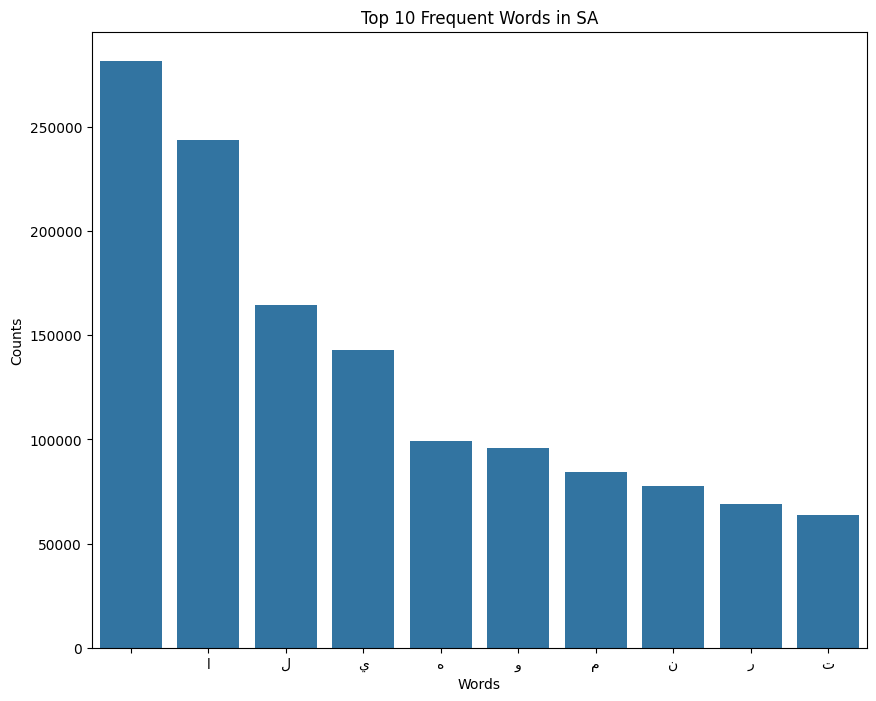

In [ ]:
top_n_word('SA' , 10)

In [ ]:
# resources
# https://medium.com/@kmelad43/arabic-dialect-identification-774de9315140
# https://github.com/KerolosMelad/Arabic-Dialect-Identification-App/blob/main/Data%20Pre-processing.ipynb